In [194]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [195]:
import pandas as pd
import math

In [196]:
TRIP_FILE = 'trip_data_3.csv'
#FARE_FILE = 'trip_fare_3.csv'
#SIZE = 5000000

In [197]:
with open(TRIP_FILE, 'r') as f:
    head = [next(f) for x in xrange(100)]

In [198]:
trip = pd.read_csv(TRIP_FILE, usecols = [" trip_time_in_secs", " trip_distance",\
                " pickup_longitude", u' pickup_latitude', u' dropoff_longitude',\
                u' dropoff_latitude'])

In [199]:
trip.columns = [u'trip_time_in_secs', u'trip_distance',\
                u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',\
                u'dropoff_latitude']

In [200]:
trip = trip[(trip['trip_time_in_secs'] > 0) & (trip['trip_distance'] < 1.)]

In [201]:
#len(trip)

In [202]:
trip['speed'] = trip['trip_distance'] / trip['trip_time_in_secs']*3600

In [142]:
# rectangle = ((40.731416, -73.982667), (40.737228, -73.996486), (40.749746, -73.987624),\
#              (40.743674, -73.973537))
# print rectangle[0] #14th and First
# print rectangle[1] #14th and Sixth
# print rectangle[2] #34th and Sixth
# print rectangle[3] #34th and First

In [203]:
coord_01 = (40.734829, -73.983134, '2nd Ave. and 18th St.')
coord_02 = (40.735757, -73.985369, '3rd Ave. and 18th St.')
coord_03 = (40.737135, -73.988550, 'Park Ave and 18th St.')
coord_04 = (40.738514, -73.991858, '5th Ave and 18th St.')
coord_05 = (40.735989, -73.982284, '2nd Ave. and 20th St.')
coord_06 = (40.736971, -73.984534, '3rd Ave. and 20th St.')
coord_07 = (40.738285, -73.987676, 'Park Ave and 20th St.')
coord_08 = (40.739681, -73.990951, '5th Ave and 20th St.')
coord_09 = (40.737169, -73.981381, '2nd Ave. and 22nd St.')    
coord_10 = (40.738161, -73.983644, '3rd Ave. and 22nd St.')
coord_11 = (40.739505, -73.986742, 'Park Ave and 22nd St.')
coord_12 = (40.740856, -73.990087, '5th Ave and 22nd St.')

In [204]:
coords = [coord_01, coord_02, coord_03, coord_04, coord_05, coord_06, coord_07, \
          coord_08, coord_09, coord_10, coord_11, coord_12]

In [217]:
tol_0 = math.fabs(coord_01[0] - coord_02[0])/2
tol_1 = math.fabs(coord_01[1] - coord_02[1])/2

latitudes = np.array([co[0] for co in coords])
longitudes = np.array([co[1] for co in coords])

min_lat = latitudes.min()
max_lat = latitudes.max()
min_long = longitudes.min()
max_long = longitudes.max()

In [219]:
trip_rectangle = trip[(trip['pickup_latitude'] > min_lat - tol_0) \
            & (trip['pickup_latitude'] < max_lat + tol_0) \
            & (trip['pickup_longitude'] > min_long - tol_0)\
            & (trip['pickup_longitude'] < max_long + tol_0)]

In [220]:
len(trip_rectangle)

123410

In [221]:
trip_rectangle['east'] = trip_rectangle['dropoff_longitude']\
-trip_rectangle['pickup_longitude']
trip_rectangle['north'] = trip_rectangle['dropoff_latitude']\
-trip_rectangle['pickup_latitude']

In [222]:
half_mile_east = 73.990930 - 73.982588
half_mile_north = 40.736871 - 40.731416
print half_mile_north
print half_mile_east

0.005455
0.008342


In [223]:
trip_north = trip_rectangle[trip_rectangle['north']> half_mile_north]
trip_south = trip_rectangle[trip_rectangle['north'] < - half_mile_north]

trip_west = trip_rectangle[trip_rectangle['east'] < -half_mile_east]

In [224]:
print('North: ' + str(len(trip_north)))
print('West: ' + str(len(trip_west)))
print('South: ' + str(len(trip_south)))

North: 39270
West: 20581
South: 26842


In [225]:
print trip_north['north'].mean()
print trip_north['east'].mean()
print trip_west['north'].mean()
print trip_west['east'].mean()
print trip_south['north'].mean()
print trip_south['east'].mean()

0.0103161209829
0.00976996432389
0.000345835819445
-0.0116775499247
-0.128714716485
0.223578566128


## Dot Plot of Trips with Coloring By Speed

In [111]:
x = np.array(trip_west['pickup_longitude'])
y = np.array(trip_west['pickup_latitude'])

z = np.sqrt(np.array(trip_west['speed']))
scaled_z = (z - z.min()) / z.ptp()
colors = plt.cm.coolwarm(scaled_z)

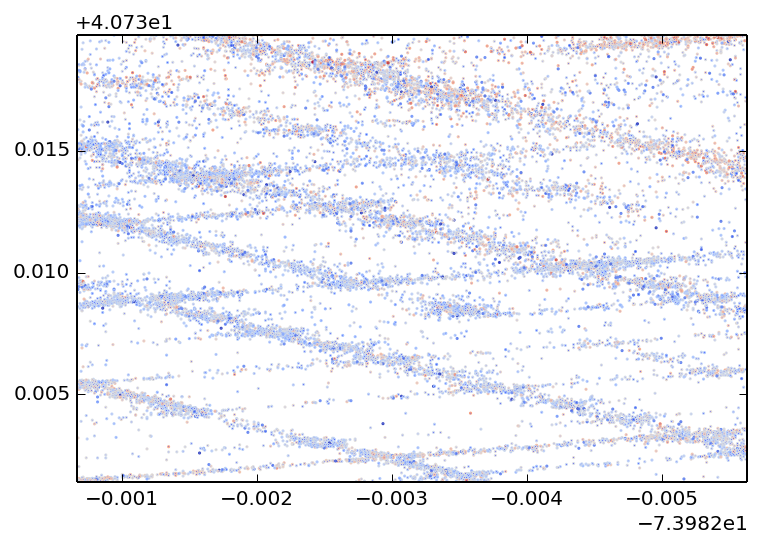

In [116]:
plt.scatter(x, y, marker='o', edgecolors=colors, s=.3)
plt.axis([rectangle[0][1], rectangle[2][1], rectangle[0][0], rectangle[2][0]])
plt.show()

##Speed of PickUp by Direction

In [226]:
north_pickups = [trip_north[(trip_north['pickup_longitude']> co[1] - tol_1) \
                      &(trip_north['pickup_longitude']<co[1] + tol_1) \
                      &(trip_north['pickup_latitude']> co[0] - tol_0) \
                    &(trip_north['pickup_latitude']< co[0] + tol_0) \
               &(trip_north['trip_distance']< 1) ] for co in coords]

In [227]:
west_pickups = [trip_west[(trip_west['pickup_longitude']> co[1] - tol_1) \
                      &(trip_west['pickup_longitude']<co[1] + tol_1) \
                      &(trip_west['pickup_latitude']> co[0] - tol_0) \
                    &(trip_west['pickup_latitude']< co[0] + tol_0) \
               &(trip_west['trip_distance']< 1) ] for co in coords]

###Make Some histograms

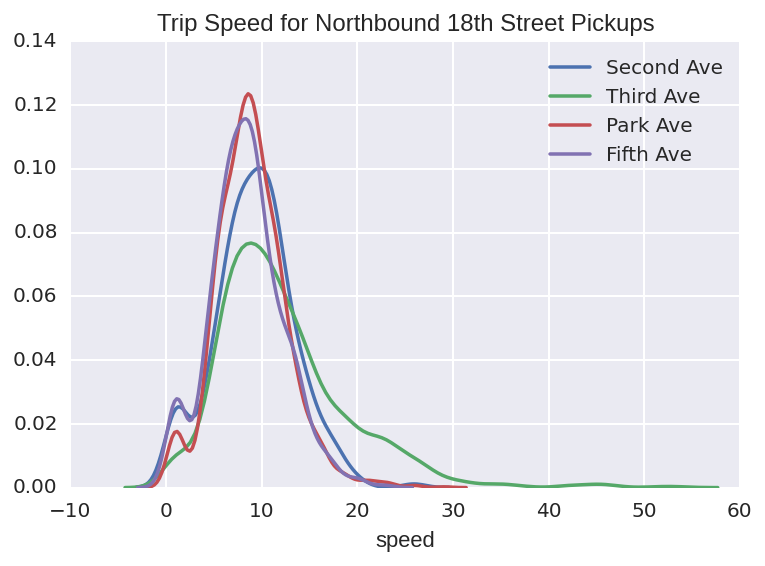

In [230]:
sns.distplot(north_pickups[0]['speed'], hist=False, label='Second Ave')
sns.distplot(north_pickups[1]['speed'], hist=False, label='Third Ave')
sns.distplot(north_pickups[2]['speed'], hist=False, label='Park Ave')
sns.distplot(north_pickups[3]['speed'], hist=False, label='Fifth Ave')
plt.title('Trip Speed for Northbound 18th Street Pickups')
plt.savefig('Northbound 18th Street Pickups')


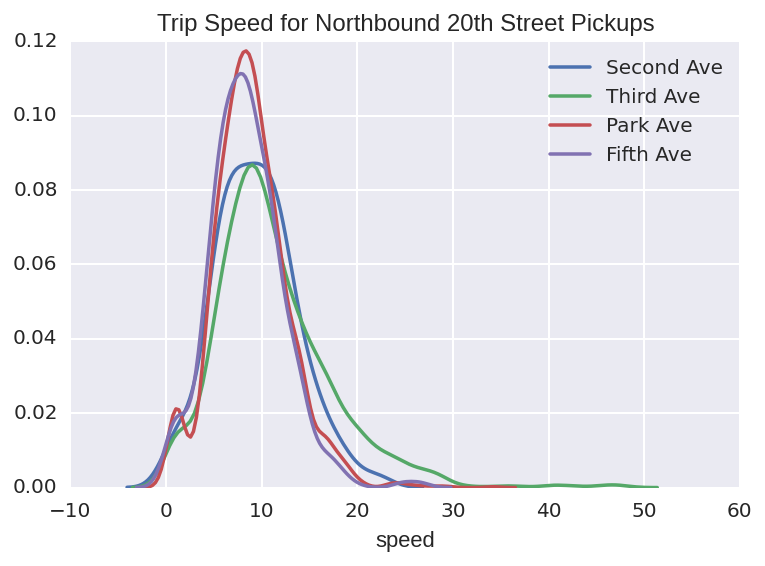

In [231]:
sns.distplot(north_pickups[4]['speed'], hist=False, label='Second Ave')
sns.distplot(north_pickups[5]['speed'], hist=False, label='Third Ave')
sns.distplot(north_pickups[6]['speed'], hist=False, label='Park Ave')
sns.distplot(north_pickups[7]['speed'], hist=False, label='Fifth Ave')
plt.title('Trip Speed for Northbound 20th Street Pickups')
plt.savefig('20th Street Pickups')

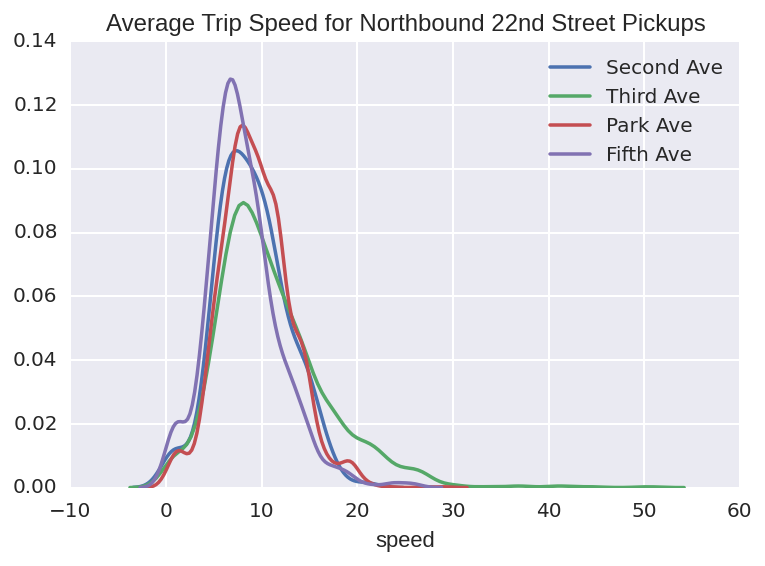

In [232]:
sns.distplot(north_pickups[8]['speed'], hist=False, label='Second Ave')
sns.distplot(north_pickups[9]['speed'], hist=False, label='Third Ave')
sns.distplot(north_pickups[10]['speed'], hist=False, label='Park Ave')
sns.distplot(north_pickups[11]['speed'], hist=False, label='Fifth Ave')
plt.title('Average Trip Speed for Northbound 22nd Street Pickups')
plt.savefig('22nd Street Pickups')

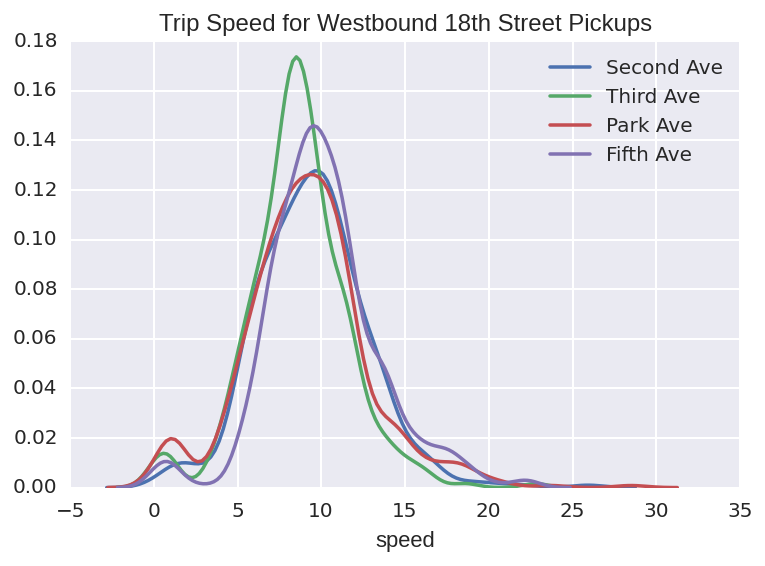

In [233]:
sns.distplot(west_pickups[0]['speed'], hist=False, label='Second Ave')
sns.distplot(west_pickups[1]['speed'], hist=False, label='Third Ave')
sns.distplot(west_pickups[2]['speed'], hist=False, label='Park Ave')
sns.distplot(west_pickups[3]['speed'], hist=False, label='Fifth Ave')
plt.title('Trip Speed for Westbound 18th Street Pickups')
plt.savefig('Westbound 18th Street Pickups')


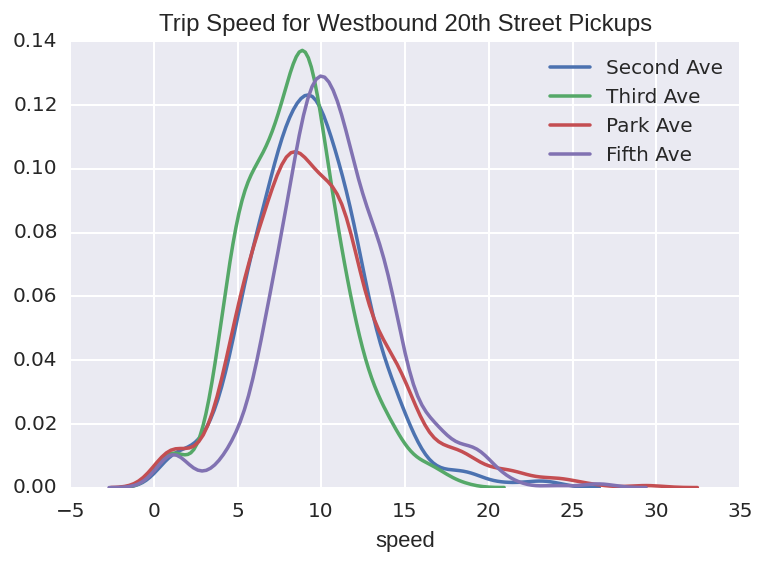

In [234]:
sns.distplot(west_pickups[4]['speed'], hist=False, label='Second Ave')
sns.distplot(west_pickups[5]['speed'], hist=False, label='Third Ave')
sns.distplot(west_pickups[6]['speed'], hist=False, label='Park Ave')
sns.distplot(west_pickups[7]['speed'], hist=False, label='Fifth Ave')
plt.title('Trip Speed for Westbound 20th Street Pickups')
plt.savefig('20th Street Westbound Pickups')

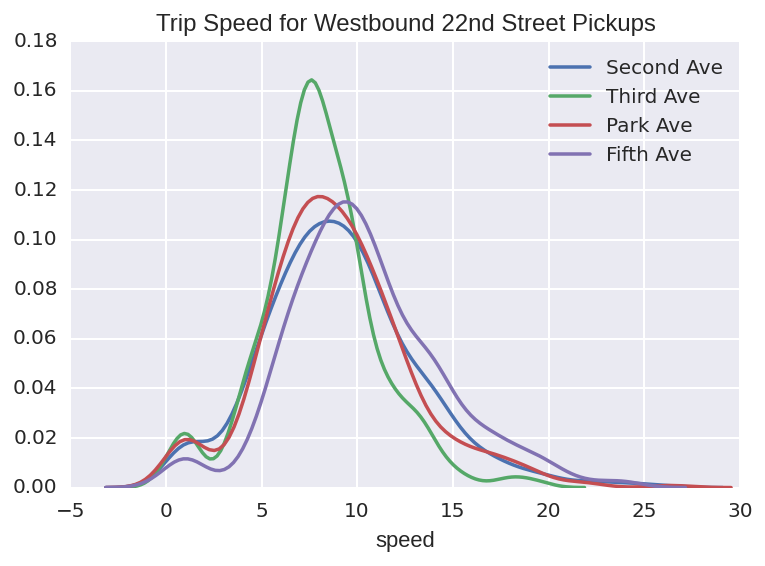

In [235]:
sns.distplot(west_pickups[8]['speed'], hist=False, label='Second Ave')
sns.distplot(west_pickups[9]['speed'], hist=False, label='Third Ave')
sns.distplot(west_pickups[10]['speed'], hist=False, label='Park Ave')
sns.distplot(west_pickups[11]['speed'], hist=False, label='Fifth Ave')
plt.title('Trip Speed for Westbound 22nd Street Pickups')
plt.savefig('22nd Street Westbound Pickups')

###Pick Up Grids

In [269]:
north_grid = np.array([item['speed'].mean() for item in north_pickups])
north_grid = north_grid.reshape((3,4))
west_grid = np.array([item['speed'].mean() for item in west_pickups])
west_grid = west_grid.reshape((3,4))

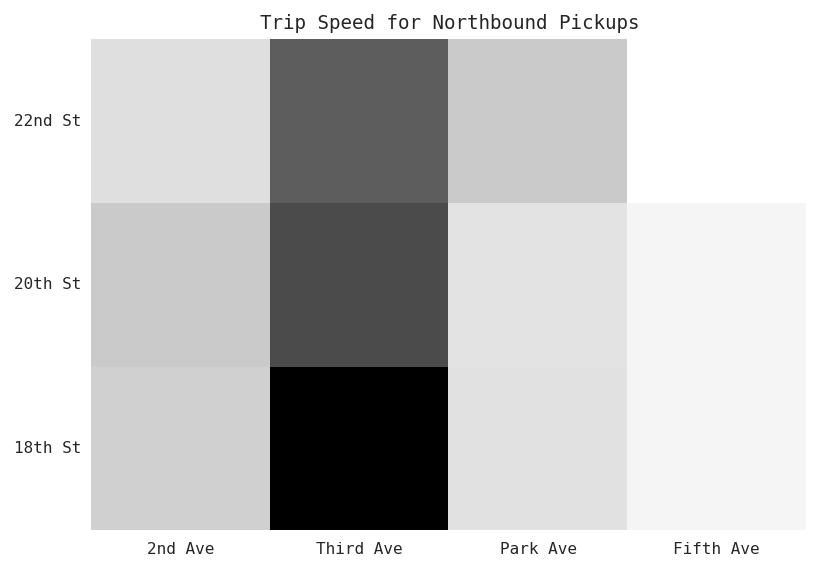

In [271]:
fig, ax = plt.subplots(1)
plt.pcolor(north_grid)
yticks = [0.5, 1.5, 2.5]
ax.set_yticklabels(['18th St', '20th St', '22nd St'])
ax.set_yticks(yticks)
ax.set_xticks([.5, 1.5, 2.5, 3.5])
ax.set_xticklabels(['2nd Ave', 'Third Ave', 'Park Ave', 'Fifth Ave'])
plt.title('Trip Speed for Northbound Pickups')

plt.show()

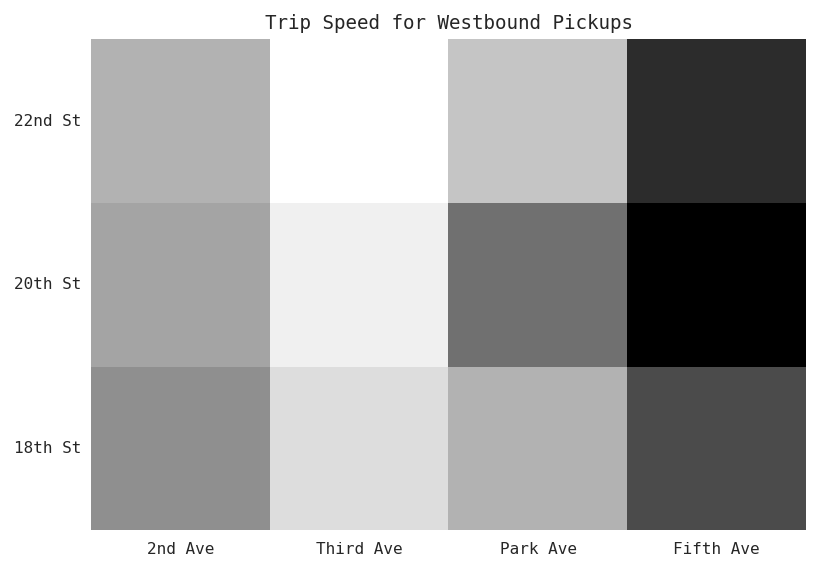

In [272]:
fig, ax = plt.subplots(1)
plt.pcolor(west_grid)
yticks = [0.5, 1.5, 2.5]
ax.set_yticklabels(['18th St', '20th St', '22nd St'])
ax.set_yticks(yticks)
ax.set_xticks([.5, 1.5, 2.5, 3.5])
ax.set_xticklabels(['2nd Ave', 'Third Ave', 'Park Ave', 'Fifth Ave'])
plt.title('Trip Speed for Westbound Pickups')

plt.show()